In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [17]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0023-09.TAUX.nc')
TAUX = data1.variables['TAUX'][0,250:600,550:1500]
lont = data1.variables['ULONG'][250:600,550:1500]
latt = data1.variables['ULAT'][250:600,550:1500]
TAUX[TAUX == -1.0] = np.nan

In [18]:
lont

masked_array(
  data=[[-54.9, -54.8, -54.7, ...,  39.8,  39.9,  40. ],
        [-54.9, -54.8, -54.7, ...,  39.8,  39.9,  40. ],
        [-54.9, -54.8, -54.7, ...,  39.8,  39.9,  40. ],
        ...,
        [-54.9, -54.8, -54.7, ...,  39.8,  39.9,  40. ],
        [-54.9, -54.8, -54.7, ...,  39.8,  39.9,  40. ],
        [-54.9, -54.8, -54.7, ...,  39.8,  39.9,  40. ]],
  mask=False,
  fill_value=1e+20)

In [19]:
latt

masked_array(
  data=[[-67.8862693 , -67.8862693 , -67.8862693 , ..., -67.8862693 ,
         -67.8862693 , -67.8862693 ],
        [-67.84400748, -67.84400748, -67.84400748, ..., -67.84400748,
         -67.84400748, -67.84400748],
        [-67.80174565, -67.80174565, -67.80174565, ..., -67.80174565,
         -67.80174565, -67.80174565],
        ...,
        [-50.32961147, -50.32961147, -50.32961147, ..., -50.32961147,
         -50.32961147, -50.32961147],
        [-50.26568862, -50.26568862, -50.26568862, ..., -50.26568862,
         -50.26568862, -50.26568862],
        [-50.20167991, -50.20167991, -50.20167991, ..., -50.20167991,
         -50.20167991, -50.20167991]],
  mask=False,
  fill_value=1e+20)

In [4]:
###### (u2-u1)/(y2-y1)
a = np.arange(0,299)
A1= np.zeros([300,700])
for i in a:
    A1[i,:] = (TAUX[i+1,:]-TAUX[i,:])/((latt[i+1,:]-latt[i,:])*110.95)

In [5]:
data2=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn300/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0022-09.TAUY.nc')
TAUY = data2.variables['TAUY'][0,200:500,600:1300]
#lont = data2.variables['ULONG']
#latt = data2.variables['ULAT']
TAUY[TAUY == -1.0] = np.nan

In [6]:
import math
#math.cos(math.radians(latt[:,3][400]))

wholedis = np.zeros(300)
for j in a:
    wholedis[j] = 111.34* math.cos(math.radians(latt[:,100][j]))

In [7]:
###### (v2-v1)/(x2-x1)
b = np.arange(0,699)
A2= np.zeros([300,700])
for j in a:
    for i in b:
        A2[j,i] = (TAUY[j,i+1]-TAUY[j,i])/((lont[j,i+1]-lont[j,i])*wholedis[j])

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Warning: converting a masked element to nan.
  


In [13]:
A2 = A2[:,:]
A3 = (A2[:] - A1[:])


In [14]:
np.nanmean(A3)

-4.299358840929892e+32

In [15]:
lont1= lont[0:600,:]
latt1 = latt[0:600,:]

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'spacing'


Text(0.5, 0, 'Sea-ice Vorticity (1/day) ,  Time(118-09)')

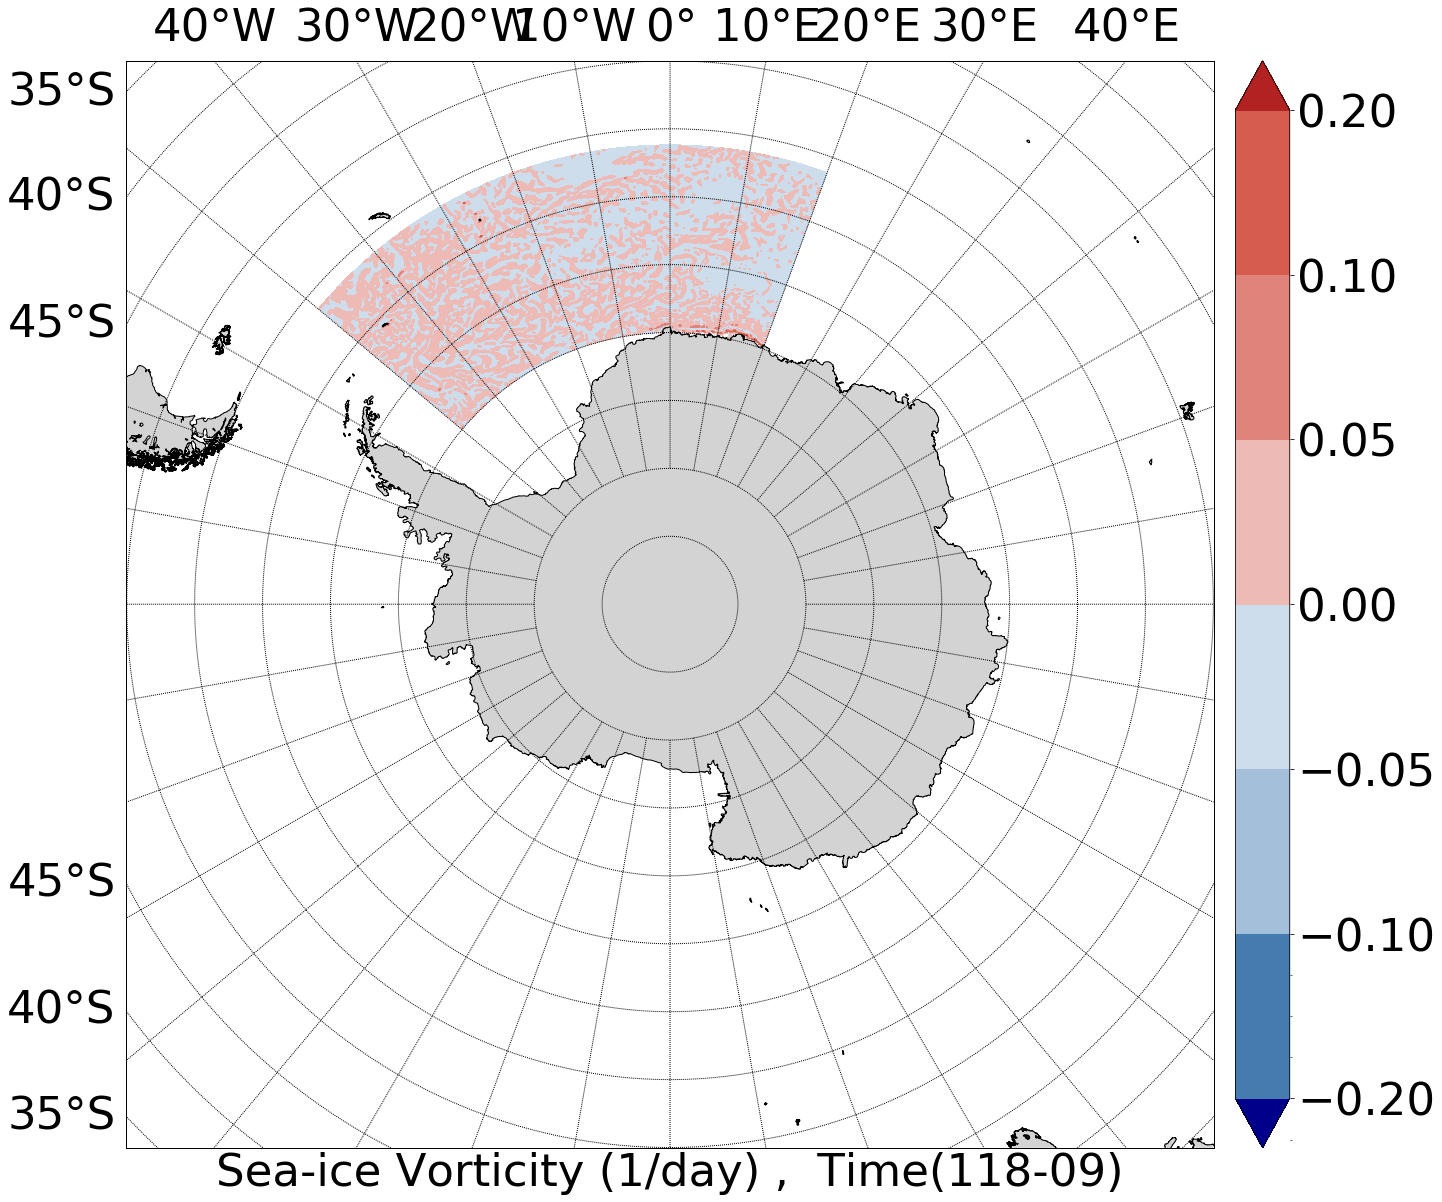

In [16]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,70,90,100,130,150,170,190,210,220,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-0.2,-0.1,-0.05,0,0.05,0.1,0.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont1,latt1)
#CP = map.contourf(x,y,A3,range(-2,3),cmap = nice_cmap,extend='both')

CP = map.contourf(x,y,A3,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')
#map.drawmeridians([3,-67],[3,-62],'purple',linestyles = 'solid',linewidths=3)
#CS=map.contour(map([2],[-67]),colors = 'b', linestyles = 'solid',linewidths=3)
#CS=map.contour(x,y,A3,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
#cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar =map.colorbar(CP)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=45) 
#cbar.set_label('(1/day)', **my_font)
plt.xlabel("Sea-ice Vorticity (1/day) ,  Time(118-09)",**my_font)
#plt.savefig("Sea-ice Vorticity 118-09new.png")

In [ ]:
x[:,200][1:300]

In [ ]:
y

In [ ]:
y[400,:][1:20]-y[400,:][0:19]